In [2]:
##tensorflow - A powerful library for machine learning and deep learning,Building and training neural networks
##matplotlib - Plotting graphs, Visualizing training history , Displaying images.
##pandas - A library for data manipulation and analysis
## seaborn - A library built on top of Matplotlib for statistical data visualization.

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None, 
    color_mode="rgb",
    batch_size=32, ## (no of images in 1 batch)
    image_size=(128, 128),
    shuffle=True,   ## avoid biasness(random order)
    seed=None,  ## same sequence
    validation_split=None,  ##entire dataset is used for training
    subset=None,   
    interpolation="bilinear",  ## method to resize images
    follow_links=False,
    crop_to_aspect_ratio=False,   ##image is resized directly to the target size
)

Found 36998 files belonging to 20 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 9248 files belonging to 20 classes.


In [6]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None))>

In [7]:
##x is a tensor containing a batch of images.
## y is a tensor containing the corresponding labels.

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

In [9]:
##Building Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
## Building Convolution Layer

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))

In [21]:
#Output Layer
model.add(Dense(units=20,activation='softmax'))

In [23]:
##Compiling Model

In [24]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [26]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1157/1157 [==============================] - 2631s 2s/step - loss: 1.1807 - accuracy: 0.6228 - val_loss: 0.5640 - val_accuracy: 0.8147
Epoch 2/10
1157/1157 [==============================] - 1580s 1s/step - loss: 0.4793 - accuracy: 0.8417 - val_loss: 0.4849 - val_accuracy: 0.8454
Epoch 3/10
1157/1157 [==============================] - 1971s 2s/step - loss: 0.3016 - accuracy: 0.9013 - val_loss: 0.3336 - val_accuracy: 0.8878
Epoch 4/10
1157/1157 [==============================] - 2598s 2s/step - loss: 0.2162 - accuracy: 0.9275 - val_loss: 0.2387 - val_accuracy: 0.9211
Epoch 5/10
1157/1157 [==============================] - 2572s 2s/step - loss: 0.1630 - accuracy: 0.9456 - val_loss: 0.2125 - val_accuracy: 0.9316
Epoch 6/10
1157/1157 [==============================] - 2235s 2s/step - loss: 0.1300 - accuracy: 0.9573 - val_loss: 0.2691 - val_accuracy: 0.9147
Epoch 7/10
1157/1157 [==============================] - 1592s 1s/step - loss: 0.1065 - accuracy: 0.9634 - val_loss: 0.1395 -

In [27]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

1157/1157 [==============================] - 352s 304ms/step - loss: 0.0543 - accuracy: 0.9836


In [28]:
print(train_loss,train_acc)

0.054305873811244965 0.9835937023162842


In [29]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

289/289 [==============================] - 107s 371ms/step - loss: 0.1649 - accuracy: 0.9522


In [30]:
print(val_loss,val_acc)

0.16488145291805267 0.9522058963775635


In [31]:
##SAVING MODEL

In [32]:
model.save("trained_model.keras")

In [33]:
training_history.history

{'loss': [1.1807388067245483,
  0.47929611802101135,
  0.30160215497016907,
  0.21615509688854218,
  0.1630079597234726,
  0.12997035682201385,
  0.10645505785942078,
  0.08801982551813126,
  0.07573306560516357,
  0.07285963743925095],
 'accuracy': [0.6228444576263428,
  0.841667115688324,
  0.9013460278511047,
  0.927509605884552,
  0.9456456899642944,
  0.9572950005531311,
  0.9634034037590027,
  0.971322774887085,
  0.9757283926010132,
  0.9756203293800354],
 'val_loss': [0.5639784932136536,
  0.4849315881729126,
  0.3335621654987335,
  0.23866453766822815,
  0.21250392496585846,
  0.2690959572792053,
  0.13954555988311768,
  0.16785390675067902,
  0.15536139905452728,
  0.16488142311573029],
 'val_accuracy': [0.8146626353263855,
  0.8453719615936279,
  0.8877595067024231,
  0.921064019203186,
  0.9315527677536011,
  0.9146842360496521,
  0.9579368233680725,
  0.9495025873184204,
  0.9542604088783264,
  0.9522058963775635]}

In [34]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [35]:
training_history.history['val_accuracy']

[0.8146626353263855,
 0.8453719615936279,
 0.8877595067024231,
 0.921064019203186,
 0.9315527677536011,
 0.9146842360496521,
 0.9579368233680725,
 0.9495025873184204,
 0.9542604088783264,
 0.9522058963775635]

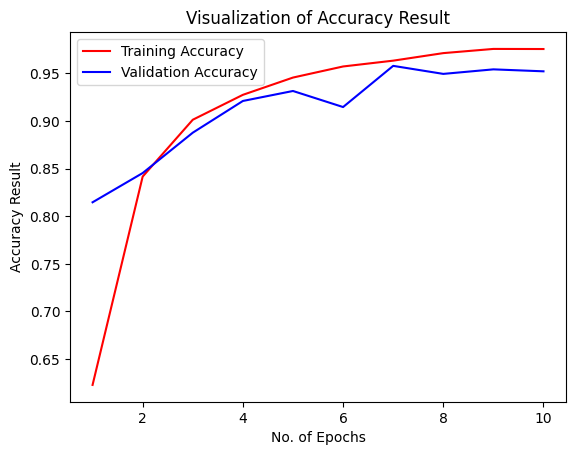

In [36]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [37]:
##Some other metrics for model evaluation

In [38]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 9248 files belonging to 20 classes.


In [40]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

289/289 [==============================] - 161s 556ms/step


(array([[9.9995577e-01, 4.4298072e-06, 5.3877742e-09, ..., 4.2292931e-12,
         4.4354668e-12, 1.8529751e-11],
        [7.6885724e-01, 3.8521815e-05, 1.8802217e-07, ..., 1.6217901e-10,
         3.0118050e-10, 9.3890753e-09],
        [9.9999964e-01, 1.4549940e-07, 9.3798551e-09, ..., 3.2278569e-13,
         3.2033686e-12, 1.5009463e-10],
        ...,
        [5.2065986e-12, 5.8591323e-15, 5.5131960e-10, ..., 2.6787739e-15,
         1.0034861e-13, 1.0000000e+00],
        [2.7859720e-12, 2.1723100e-15, 9.6813821e-11, ..., 2.7892149e-16,
         9.7258186e-15, 1.0000000e+00],
        [5.6859868e-12, 8.3314208e-14, 1.9919528e-12, ..., 4.4070946e-15,
         5.6653933e-13, 9.9999654e-01]], dtype=float32),
 (9248, 20))

In [41]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [42]:
predicted_categories

<tf.Tensor: shape=(9248,), dtype=int64, numpy=array([ 0,  0,  0, ..., 19, 19, 19], dtype=int64)>

In [43]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(9248, 20), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

In [ ]:
##Confusion Matrix Visualization
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()